In [1]:
!pip install mysql-connector-python
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import mysql.connector

In [5]:
db_config = {
    'host': '18.136.157.135',
    'user': 'dm_team2',
    'password': 'DM!$Team&27@9!20!',
    'database': 'project_sales',
    'port': 3306
}

query = "SELECT * FROM data"
conn = mysql.connector.connect(**db_config)
df = pd.read_sql(query, conn)
conn.close()

C:\Users\91776\AppData\Local\Temp\ipykernel_7736\1862820709.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [7]:
print("Initial shape:", df.shape)
df = df.drop(columns=["Mobile", "EMAIL"])  # Drop high-cardinality PII
df.dropna(inplace=True)
print("After dropping nulls:", df.shape)

Initial shape: (7422, 9)
After dropping nulls: (7422, 7)


In [9]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [11]:
X = df.drop("Status", axis=1)
y = df["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.2734006734006734

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.31      0.33       178
           1       0.16      0.15      0.15       124
           2       0.31      0.32      0.32       134
           3       0.36      0.35      0.35       317
           4       0.19      0.26      0.22       137
           5       0.12      0.12      0.12        76
           6       0.15      0.17      0.16       113
           7       0.31      0.33      0.32       236
           8       0.83      0.83      0.83        12
           9       0.23      0.18      0.20       155
          10       0.00      0.00      0.00         3

    accuracy                           0.27      1485
   macro avg       0.28      0.27      0.27      1485
weighted avg       0.28      0.27      0.27      1485



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


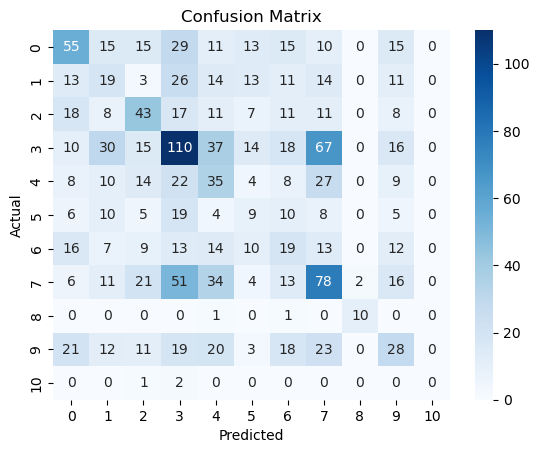

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

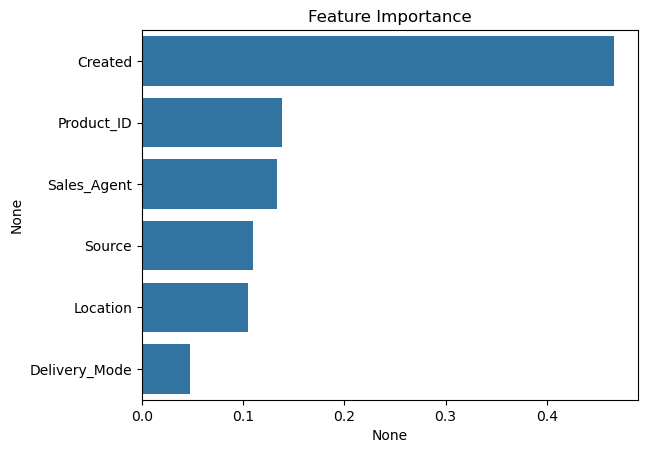

In [19]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()